In [55]:
# Importar librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Cargar los datos (ajusta la ruta según tu entorno)
print("Cargando datasets IEEE Fraud Detection...")
train_identity = pd.read_csv(r"C:\Users\kevin\Downloads\train_identity.csv.zip")
train_transaction = pd.read_csv(r"C:\Users\kevin\Downloads\train_transaction.csv.zip")

# Unir los datasets
print("Uniendo datasets...")
df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
print(f"Dataset final: {df.shape}")

# Muestra inicial
print("\nPrimeras filas del dataset:")
display(df.head())

Cargando datasets IEEE Fraud Detection...
Uniendo datasets...
Dataset final: (590540, 434)

Primeras filas del dataset:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [56]:
print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"• Total de registros: {df.shape[0]:,}")
print(f"• Total de características: {df.shape[1]}")
print(f"• Transacciones fraudulentas: {df['isFraud'].sum():,} ({df['isFraud'].mean():.2%})")
print(f"• Transacciones legítimas: {(df['isFraud'] == 0).sum():,} ({(df['isFraud'] == 0).mean():.2%})")

# Tipos de datos y valores nulos
print("\n=== TIPOS DE DATOS Y VALORES NULOS ===")
info_df = pd.DataFrame({
    'Tipo': df.dtypes,
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos': (df.isnull().sum() / len(df)) * 100
})
print(info_df.sort_values('Porcentaje_Nulos', ascending=False).head(15))

=== INFORMACIÓN BÁSICA DEL DATASET ===
• Total de registros: 590,540
• Total de características: 434
• Transacciones fraudulentas: 20,663 (3.50%)
• Transacciones legítimas: 569,877 (96.50%)

=== TIPOS DE DATOS Y VALORES NULOS ===
          Tipo  Valores_Nulos  Porcentaje_Nulos
id_24  float64         585793         99.196159
id_25  float64         585408         99.130965
id_07  float64         585385         99.127070
id_08  float64         585385         99.127070
id_21  float64         585381         99.126393
id_26  float64         585377         99.125715
id_27   object         585371         99.124699
id_23   object         585371         99.124699
id_22  float64         585371         99.124699
dist2  float64         552913         93.628374
D7     float64         551623         93.409930
id_18  float64         545427         92.360721
D13    float64         528588         89.509263
D14    float64         528353         89.469469
D12    float64         525823         89.041047


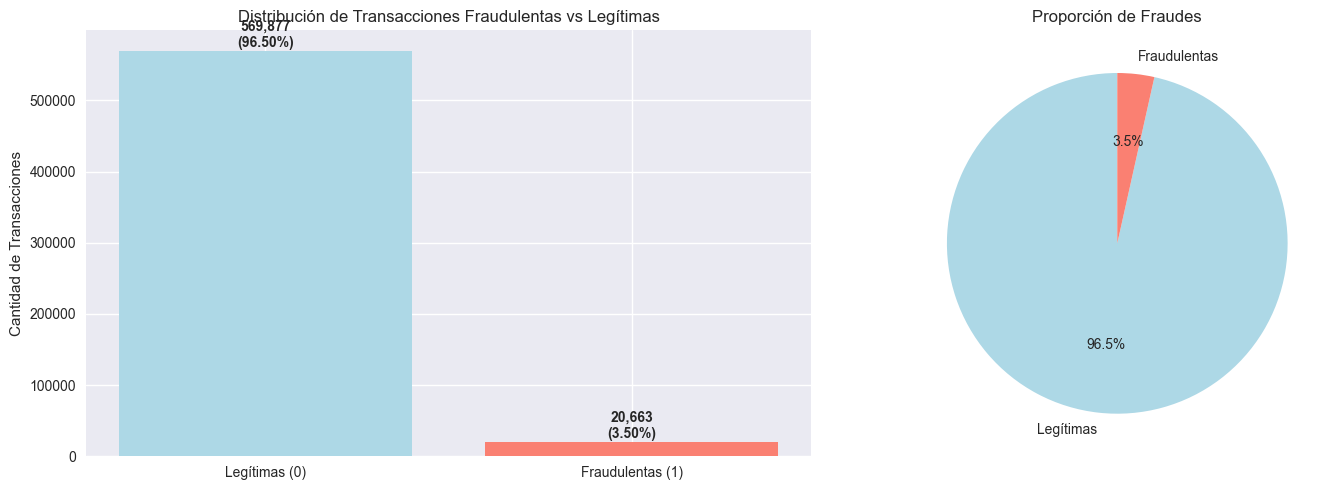

🚨 EL DATASET ESTÁ EXTREMADAMENTE DESBALANCEADO: 3.4990% de fraudes


In [57]:
# Visualización del desbalanceo
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
fraud_counts = df['isFraud'].value_counts()
axes[0].bar(['Legítimas (0)', 'Fraudulentas (1)'], fraud_counts.values, 
           color=['lightblue', 'salmon'])
axes[0].set_title('Distribución de Transacciones Fraudulentas vs Legítimas')
axes[0].set_ylabel('Cantidad de Transacciones')

# Añadir porcentajes en las barras
for i, v in enumerate(fraud_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}\n({v/len(df):.2%})', 
                ha='center', va='bottom', fontweight='bold')

# Gráfico de pie
colors = ['lightblue', 'salmon']
axes[1].pie(fraud_counts.values, labels=['Legítimas', 'Fraudulentas'], 
           colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporción de Fraudes')

plt.tight_layout()
plt.show()

print(f"🚨 EL DATASET ESTÁ EXTREMADAMENTE DESBALANCEADO: {df['isFraud'].mean():.4%} de fraudes")

=== ESTADÍSTICAS DE MONTOS POR TIPO ===
            count        mean         std    min     25%   50%    75%  \
isFraud                                                                 
0        569877.0  134.511665  239.395078  0.251  43.970  68.5  120.0   
1         20663.0  149.244779  232.212163  0.292  35.044  75.0  161.0   

               max  
isFraud             
0        31937.391  
1         5191.000  


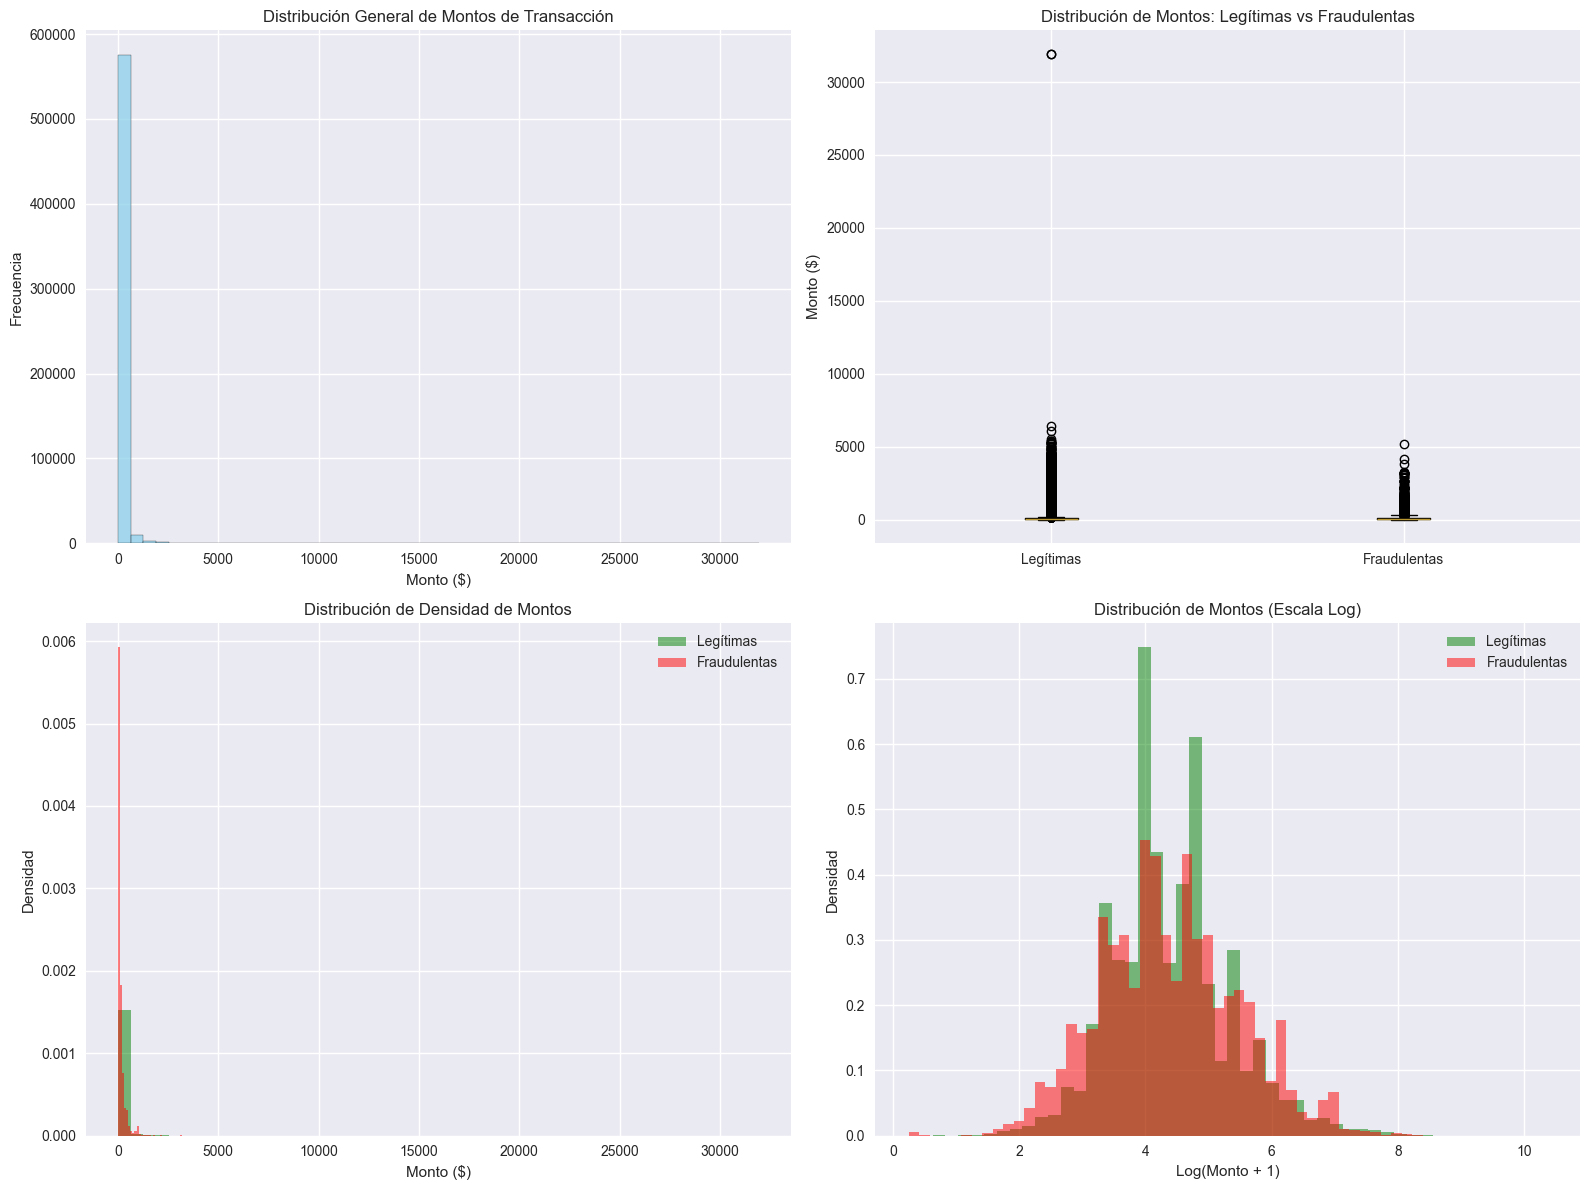

In [58]:
# Análisis de montos por tipo de transacción
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribución general de montos
axes[0,0].hist(df['TransactionAmt'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribución General de Montos de Transacción')
axes[0,0].set_xlabel('Monto ($)')
axes[0,0].set_ylabel('Frecuencia')

# Montos por fraude vs legítimo
fraud_amt = df[df['isFraud'] == 1]['TransactionAmt']
legit_amt = df[df['isFraud'] == 0]['TransactionAmt']

axes[0,1].boxplot([legit_amt, fraud_amt], labels=['Legítimas', 'Fraudulentas'])
axes[0,1].set_title('Distribución de Montos: Legítimas vs Fraudulentas')
axes[0,1].set_ylabel('Monto ($)')

# Estadísticas descriptivas
print("=== ESTADÍSTICAS DE MONTOS POR TIPO ===")
stats_df = df.groupby('isFraud')['TransactionAmt'].describe()
print(stats_df)

# Densidad de montos
axes[1,0].hist(legit_amt, bins=50, alpha=0.5, label='Legítimas', color='green', density=True)
axes[1,0].hist(fraud_amt, bins=50, alpha=0.5, label='Fraudulentas', color='red', density=True)
axes[1,0].set_title('Distribución de Densidad de Montos')
axes[1,0].set_xlabel('Monto ($)')
axes[1,0].set_ylabel('Densidad')
axes[1,0].legend()

# Log-scale para mejor visualización
axes[1,1].hist(np.log1p(legit_amt), bins=50, alpha=0.5, label='Legítimas', color='green', density=True)
axes[1,1].hist(np.log1p(fraud_amt), bins=50, alpha=0.5, label='Fraudulentas', color='red', density=True)
axes[1,1].set_title('Distribución de Montos (Escala Log)')
axes[1,1].set_xlabel('Log(Monto + 1)')
axes[1,1].set_ylabel('Densidad')
axes[1,1].legend()

plt.tight_layout()
plt.show()

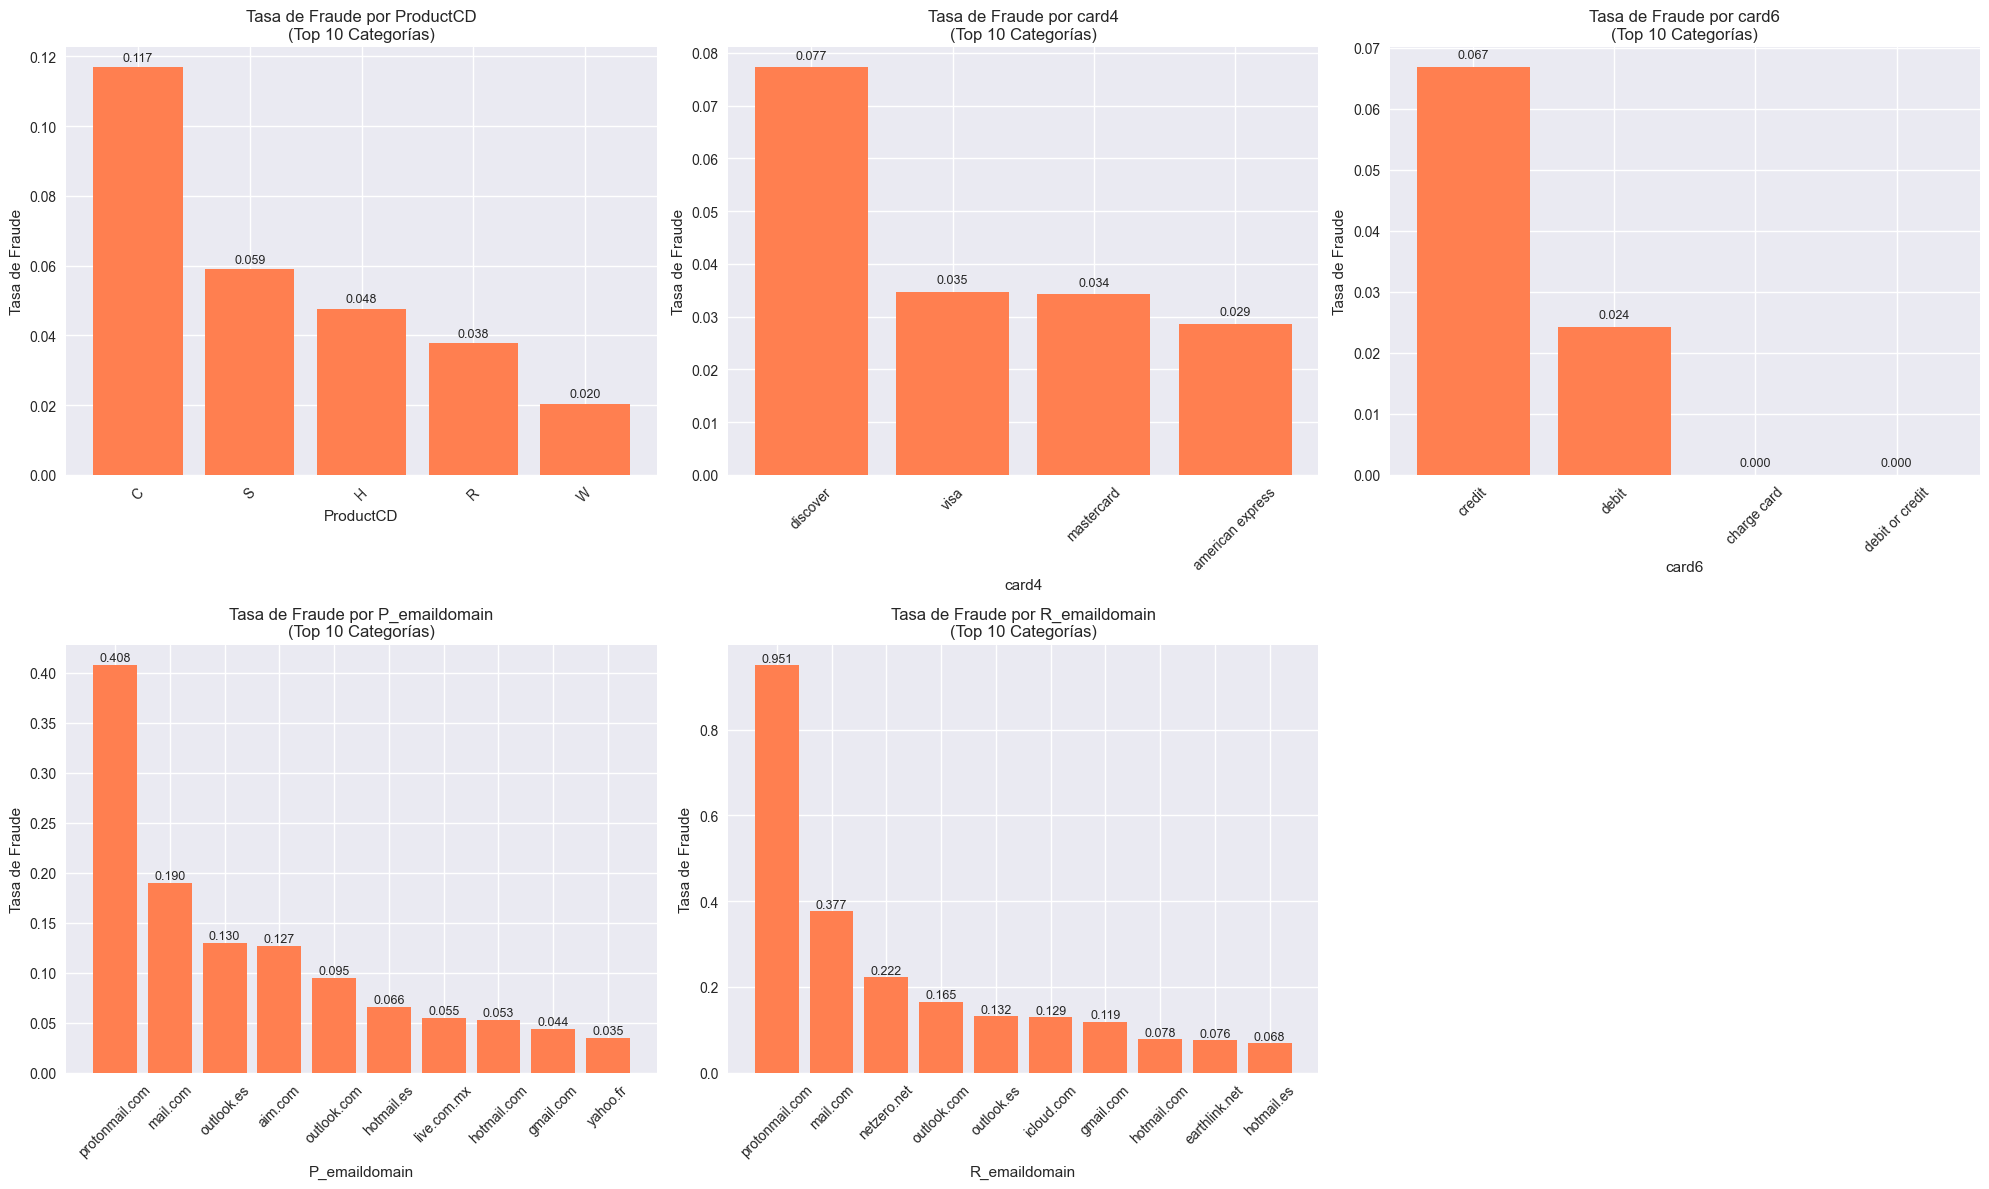

In [59]:
# Analizar variables categóricas clave
categorical_vars = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, var in enumerate(categorical_vars[:6]):  # Solo las primeras 6
    if var in df.columns:
        # Calcular tasas de fraude por categoría
        fraud_rates = df.groupby(var)['isFraud'].mean().sort_values(ascending=False)
        
        # Tomar top 10 categorías
        top_categories = fraud_rates.head(10)
        
        axes[i].bar(range(len(top_categories)), top_categories.values, color='coral')
        axes[i].set_title(f'Tasa de Fraude por {var}\n(Top 10 Categorías)')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Tasa de Fraude')
        axes[i].set_xticks(range(len(top_categories)))
        axes[i].set_xticklabels(top_categories.index, rotation=45)
        
        # Añadir valores en las barras
        for j, v in enumerate(top_categories.values):
            axes[i].text(j, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Ocultar ejes vacíos
for i in range(len(categorical_vars), 6):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

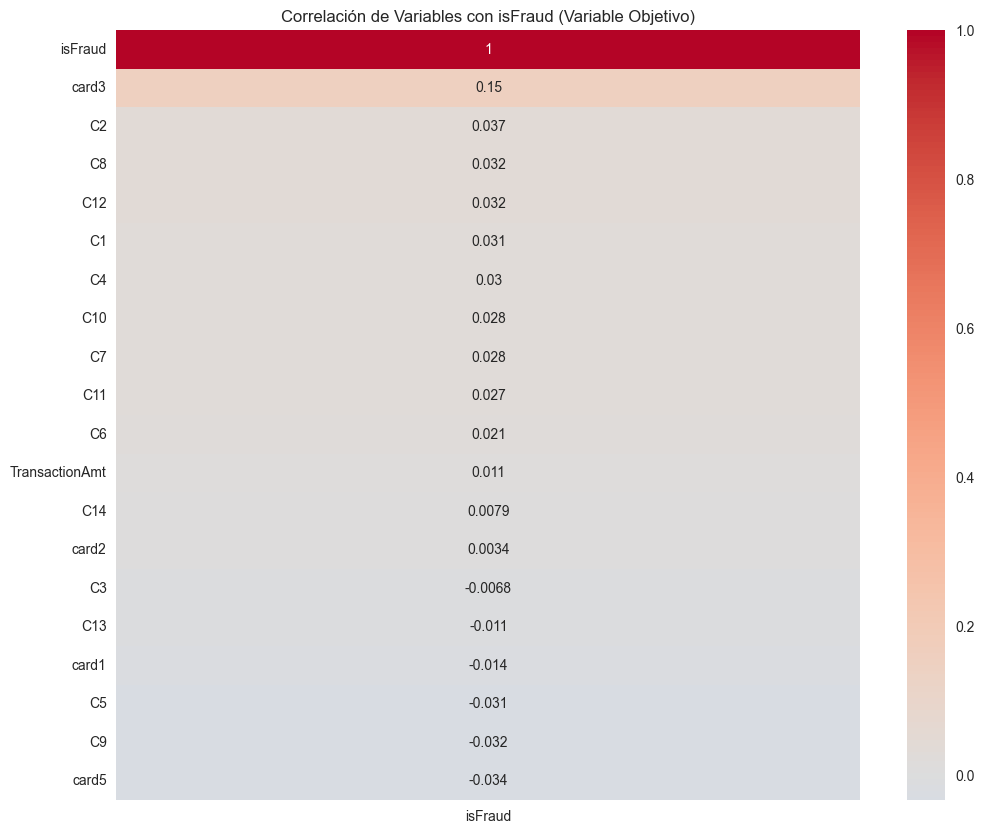

=== TOP 10 VARIABLES MÁS CORRELACIONADAS CON FRAUDE ===
isFraud    1.000000
card3      0.154151
C2         0.037229
card5      0.033580
C8         0.032139
C12        0.031905
C9         0.031703
C5         0.030754
C1         0.030570
C4         0.030382
Name: isFraud, dtype: float64


In [60]:
# Seleccionar variables numéricas para correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Tomar solo algunas variables importantes para evitar sobrecarga
important_numeric = ['TransactionAmt', 'isFraud', 'card1', 'card2', 'card3', 'card5', 
                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']

# Filtrar las que existen en el dataset
existing_cols = [col for col in important_numeric if col in df.columns]
corr_matrix = df[existing_cols].corr()

# Matriz de correlación con la variable objetivo
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['isFraud']].sort_values('isFraud', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de Variables con isFraud (Variable Objetivo)')
plt.show()

# Top 10 variables más correlacionadas con el fraude
fraud_correlations = corr_matrix['isFraud'].abs().sort_values(ascending=False)
print("=== TOP 10 VARIABLES MÁS CORRELACIONADAS CON FRAUDE ===")
print(fraud_correlations.head(10))

In [61]:
# Crear un resumen ejecutivo
print("="*80)
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS")
print("="*80)

print(f"📊 DATOS GENERALES:")
print(f"   • Total de transacciones: {df.shape[0]:,}")
print(f"   • Variables disponibles: {df.shape[1]}")
print(f"   • Tasa global de fraude: {df['isFraud'].mean():.4%}")

print(f"\n⚠️  PROBLEMAS IDENTIFICADOS:")
print(f"   • Desbalanceo extremo: Solo {df['isFraud'].sum():,} fraudes de {len(df):,} transacciones")
print(f"   • Variables con muchos nulos: {sum(df.isnull().sum() / len(df) > 0.5)} variables con >50% nulos")

print(f"\n🎯 INSIGHTS CLAVE:")
# Monto promedio de fraudes vs legítimas
if 'TransactionAmt' in df.columns:
    avg_fraud = df[df['isFraud'] == 1]['TransactionAmt'].mean()
    avg_legit = df[df['isFraud'] == 0]['TransactionAmt'].mean()
    print(f"   • Monto promedio fraudes: ${avg_fraud:,.2f} vs legítimas: ${avg_legit:,.2f}")

# Variables más correlacionadas
if len(fraud_correlations) > 1:
    top_corr_var = fraud_correlations.index[1]  # Saltar isFraud misma
    top_corr_val = fraud_correlations.iloc[1]
    print(f"   • Variable más correlacionada: {top_corr_var} (corr: {top_corr_val:.3f})")

print(f"\n🚀 RECOMENDACIONES PARA MODELADO:")
print(f"   • Necesario balanceo de datos (SMOTE/Undersampling)")
print(f"   • Enfoque en métricas: Recall y Precision (no Accuracy)")
print(f"   • Feature engineering basado en correlaciones descubiertas")
print("="*80)

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS
📊 DATOS GENERALES:
   • Total de transacciones: 590,540
   • Variables disponibles: 434
   • Tasa global de fraude: 3.4990%

⚠️  PROBLEMAS IDENTIFICADOS:
   • Desbalanceo extremo: Solo 20,663 fraudes de 590,540 transacciones
   • Variables con muchos nulos: 214 variables con >50% nulos

🎯 INSIGHTS CLAVE:
   • Monto promedio fraudes: $149.24 vs legítimas: $134.51
   • Variable más correlacionada: card3 (corr: 0.154)

🚀 RECOMENDACIONES PARA MODELADO:
   • Necesario balanceo de datos (SMOTE/Undersampling)
   • Enfoque en métricas: Recall y Precision (no Accuracy)
   • Feature engineering basado en correlaciones descubiertas


In [62]:
# Hacer una copia del dataset original para preservar los datos crudos
df_clean = df.copy()
print(f"Dataset original: {df.shape}")
print(f"Dataset para limpieza: {df_clean.shape}")

# Identificar variables con demasiados valores nulos (>50%)
print("\n=== IDENTIFICANDO VARIABLES CON MUCHOS VALORES NULOS ===")
null_percentage = (df_clean.isnull().sum() / len(df_clean)) * 100
high_null_vars = null_percentage[null_percentage > 50].index.tolist()

print(f"Variables con >50% de valores nulos: {len(high_null_vars)}")
print("Algunas variables a eliminar:", high_null_vars[:10])

# Eliminar variables con muchos nulos
df_clean = df_clean.drop(columns=high_null_vars)
print(f"Dataset después de eliminar variables con muchos nulos: {df_clean.shape}")

Dataset original: (590540, 434)
Dataset para limpieza: (590540, 434)

=== IDENTIFICANDO VARIABLES CON MUCHOS VALORES NULOS ===
Variables con >50% de valores nulos: 214
Algunas variables a eliminar: ['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13']
Dataset después de eliminar variables con muchos nulos: (590540, 220)


In [63]:
# Separar variables numéricas y categóricas
numeric_vars = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = df_clean.select_dtypes(include=['object']).columns.tolist()

# Remover la variable objetivo de las listas
if 'isFraud' in numeric_vars:
    numeric_vars.remove('isFraud')
if 'isFraud' in categorical_vars:
    categorical_vars.remove('isFraud')

print(f"Variables numéricas: {len(numeric_vars)}")
print(f"Variables categóricas: {len(categorical_vars)}")
print(f"\nEjemplos numéricas: {numeric_vars[:5]}")
print(f"Ejemplos categóricas: {categorical_vars[:5]}")

Variables numéricas: 210
Variables categóricas: 9

Ejemplos numéricas: ['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2']
Ejemplos categóricas: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1']


In [ ]:
print(" MANEJANDO VALORES NULOS ")

# Para variables numéricas: imputar con mediana
from sklearn.impute import SimpleImputer

print("Imputando valores nulos en variables numéricas...")
numeric_imputer = SimpleImputer(strategy='median')
df_clean[numeric_vars] = numeric_imputer.fit_transform(df_clean[numeric_vars])

# Para variables categóricas: imputar con 'Unknown' o moda
print("Imputando valores nulos en variables categóricas...")
for col in categorical_vars:
    if df_clean[col].isnull().sum() > 0:
        # Si hay pocos valores únicos, usar moda
        if df_clean[col].nunique() < 50:
            df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown', inplace=True)
        else:
            df_clean[col].fillna('Unknown', inplace=True)

# Verificar que no quedan nulos
remaining_nulls = df_clean.isnull().sum().sum()
print(f"Valores nulos restantes: {remaining_nulls}")

=== MANEJANDO VALORES NULOS ===
Imputando valores nulos en variables numéricas...
Imputando valores nulos en variables categóricas...
Valores nulos restantes: 0


In [65]:
print("=== CREANDO NUEVAS FEATURES (FEATURE ENGINEERING) ===")

# 1. Features basadas en TransactionAmt
df_clean['TransactionAmt_log'] = np.log1p(df_clean['TransactionAmt'])
df_clean['TransactionAmt_binned'] = pd.cut(df_clean['TransactionAmt'], 
                                         bins=[0, 10, 50, 100, 500, 1000, np.inf], 
                                         labels=['0-10', '10-50', '50-100', '100-500', '500-1000', '1000+'])

# 2. Features de tarjeta (si existen)
card_cols = [col for col in df_clean.columns if 'card' in col.lower()]
print(f"Variables de tarjeta encontradas: {card_cols}")

# 3. Features de agregación por cliente (si existe TransactionID o similar)
if 'card1' in df_clean.columns:
    # Agregar características de comportamiento por tarjeta
    card_stats = df_clean.groupby('card1').agg({
        'TransactionAmt': ['mean', 'std', 'count'],
        'isFraud': 'mean'
    }).reset_index()
    
    card_stats.columns = ['card1', 'card1_avg_amt', 'card1_std_amt', 'card1_trans_count', 'card1_fraud_rate']
    
    # Unir con el dataset principal
    df_clean = df_clean.merge(card_stats, on='card1', how='left')

# 4. Features de densidad (si existen variables de tiempo)
if 'TransactionDT' in df_clean.columns:
    # Crear características temporales básicas
    df_clean['Transaction_hour'] = (df_clean['TransactionDT'] // 3600) % 24
    df_clean['Transaction_day'] = (df_clean['TransactionDT'] // 86400) % 7
    df_clean['is_weekend'] = df_clean['Transaction_day'].isin([5, 6]).astype(int)

print(f"Nuevo shape después de feature engineering: {df_clean.shape}")

=== CREANDO NUEVAS FEATURES (FEATURE ENGINEERING) ===
Variables de tarjeta encontradas: ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
Nuevo shape después de feature engineering: (590540, 229)


In [66]:
print("=== CODIFICANDO VARIABLES CATEGÓRICAS ===")

# Estrategia: One-Hot Encoding para categorías con pocos valores, Label Encoding para muchas categorías
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Identificar categorías con pocos valores únicos (<10)
low_cardinality_vars = []
high_cardinality_vars = []

for col in categorical_vars:
    if col in df_clean.columns:
        unique_count = df_clean[col].nunique()
        if unique_count <= 10:
            low_cardinality_vars.append(col)
        else:
            high_cardinality_vars.append(col)

print(f"Variables para One-Hot Encoding (<10 categorías): {len(low_cardinality_vars)}")
print(f"Variables para Label Encoding (>10 categorías): {len(high_cardinality_vars)}")

# One-Hot Encoding para variables con pocas categorías
print("Aplicando One-Hot Encoding...")
df_encoded = pd.get_dummies(df_clean, columns=low_cardinality_vars, drop_first=True)

# Label Encoding para variables con muchas categorías
print("Aplicando Label Encoding...")
le = LabelEncoder()
for col in high_cardinality_vars:
    if col in df_encoded.columns:
        df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str))
        # Eliminar la columna original después de codificar
        df_encoded.drop(columns=[col], inplace=True)

print(f"Shape final después de encoding: {df_encoded.shape}")

=== CODIFICANDO VARIABLES CATEGÓRICAS ===
Variables para One-Hot Encoding (<10 categorías): 8
Variables para Label Encoding (>10 categorías): 1
Aplicando One-Hot Encoding...
Aplicando Label Encoding...
Shape final después de encoding: (590540, 237)


In [67]:
print("=== ESCALANDO VARIABLES NUMÉRICAS ===")

from sklearn.preprocessing import StandardScaler

# Identificar las nuevas variables numéricas después del encoding
final_numeric_vars = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
# Remover la variable objetivo
if 'isFraud' in final_numeric_vars:
    final_numeric_vars.remove('isFraud')

print(f"Variables numéricas a escalar: {len(final_numeric_vars)}")

# Aplicar StandardScaler
scaler = StandardScaler()
df_encoded[final_numeric_vars] = scaler.fit_transform(df_encoded[final_numeric_vars])

print("Escalado completado!")

=== ESCALANDO VARIABLES NUMÉRICAS ===
Variables numéricas a escalar: 219
Escalado completado!


In [68]:
print("=== CARGA Y PREPARACIÓN DE DATOS ===")

import pandas as pd
import numpy as np
import joblib

# Cargar los datos preprocesados que ya teníamos
print("Cargando datos preprocesados...")
try:
    preprocessed_data = joblib.load('model_data/preprocessed_data.joblib')
    X = preprocessed_data['X_train'].copy()  # Usar una copia para no modificar el original
    y = preprocessed_data['y_train'].copy()
    print(f"✅ Datos cargados: X.shape = {X.shape}, y.shape = {y.shape}")
except:
    print("❌ No se pudo cargar preprocessed_data.joblib")
    print("Volviendo a cargar desde los datos originales...")
    
    # Si no existe, cargar los datos originales
    # (Aquí deberías tener tu código original de carga de datos)
    # X = ... [tu código de carga original]
    pass

# Si X no está definido, necesitamos crearlo desde el principio
if 'X' not in locals():
    print("⚠️  X no está definido. Necesitamos recrear el dataset...")
    # Aquí iría tu código original para crear X
    # Por ahora, asumamos que necesitamos recargar todo
    print("Por favor ejecuta las celdas anteriores primero o proporciona el dataset X")
else:
    print("Continuando con el manejo de columnas problemáticas...")

=== CARGA Y PREPARACIÓN DE DATOS ===
Cargando datos preprocesados...
✅ Datos cargados: X.shape = (205154, 235), y.shape = (205154,)
Continuando con el manejo de columnas problemáticas...


In [69]:
print("=== IDENTIFICANDO Y MANEJANDO COLUMNAS PROBLEMÁTICAS ===")

# Verificar que X existe
if 'X' not in locals():
    print("❌ ERROR: X no está definido")
    print("Por favor ejecuta primero la celda de carga de datos")
else:
    print(f"Shape inicial de X: {X.shape}")
    
    # Identificar columnas con todos los valores NaN
    all_nan_cols = X.columns[X.isnull().all()].tolist()
    print(f"Columnas con TODOS los valores NaN: {len(all_nan_cols)}")
    if all_nan_cols:
        print("Columnas a eliminar:", all_nan_cols[:10])  # Mostrar solo primeras 10

    # Identificar columnas con muchos NaN (>90%)
    high_nan_cols = X.columns[(X.isnull().sum() / len(X)) > 0.9].tolist()
    print(f"\nColumnas con >90% de valores NaN: {len(high_nan_cols)}")
    if high_nan_cols:
        print("Ejemplos de columnas con muchos NaN:", high_nan_cols[:5])

    # Columnas problemáticas totales
    problem_cols = list(set(all_nan_cols + high_nan_cols))
    print(f"\nTotal de columnas problemáticas a eliminar: {len(problem_cols)}")

    # Eliminar columnas problemáticas
    if problem_cols:
        print(f"Eliminando {len(problem_cols)} columnas problemáticas...")
        X_clean = X.drop(columns=problem_cols)
        print(f"Nuevo shape de X: {X_clean.shape}")
    else:
        X_clean = X.copy()
        print("No hay columnas problemáticas para eliminar")

    # Verificar NaN restantes
    print(f"\nNaN restantes después de eliminar columnas problemáticas: {X_clean.isnull().sum().sum()}")

    # Imputar los NaN restantes
    if X_clean.isnull().sum().sum() > 0:
        print("Imputando NaN restantes...")
        from sklearn.impute import SimpleImputer
        imputer = SimpleImputer(strategy='median')
        X_imputed = imputer.fit_transform(X_clean)
        X_clean = pd.DataFrame(X_imputed, columns=X_clean.columns, index=X_clean.index)
        print("✅ NaN imputados exitosamente")

    print(f"Valores NaN finales: {X_clean.isnull().sum().sum()}")
    print(f"Shape final de X: {X_clean.shape}")
    
    # Guardar X limpio para usar en siguientes pasos
    X = X_clean
    print("✅ X actualizado y listo para el siguiente paso")

=== IDENTIFICANDO Y MANEJANDO COLUMNAS PROBLEMÁTICAS ===
Shape inicial de X: (205154, 235)
Columnas con TODOS los valores NaN: 0

Columnas con >90% de valores NaN: 0

Total de columnas problemáticas a eliminar: 0
No hay columnas problemáticas para eliminar

NaN restantes después de eliminar columnas problemáticas: 0
Valores NaN finales: 0
Shape final de X: (205154, 235)
✅ X actualizado y listo para el siguiente paso


In [70]:
print("=== APLICANDO BALANCEO DE DATOS ===")

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Verificación final
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")
print(f"Tipos de datos en X: {X.dtypes.unique()}")

print(f"\nDistribución original:")
print(y.value_counts())
print(f"Tasa de fraude original: {y.mean():.4%}")

# Aplicar balanceo
print("\nAplicando SMOTE + RandomUnderSampler...")
try:
    over = SMOTE(sampling_strategy=0.2, random_state=42)
    under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
    
    pipeline = Pipeline([
        ('oversample', over),
        ('undersample', under)
    ])
    
    X_balanced, y_balanced = pipeline.fit_resample(X, y)
    print("✅ Balanceo completado exitosamente!")
    
except Exception as e:
    print(f"❌ Error en el balanceo: {e}")
    print("Probando estrategia alternativa...")
    
    # Estrategia alternativa: solo SMOTE con sampling más bajo
    over = SMOTE(sampling_strategy=0.1, random_state=42)
    X_balanced, y_balanced = over.fit_resample(X, y)
    print("✅ Balanceo alternativo completado")

print(f"Shape antes: {X.shape} -> después: {X_balanced.shape}")
print(f"Distribución balanceada:")
print(pd.Series(y_balanced).value_counts())
print(f"Tasa de fraude balanceada: {y_balanced.mean():.4%}")

=== APLICANDO BALANCEO DE DATOS ===
Shape de X: (205154, 235)
Shape de y: (205154,)
Tipos de datos en X: [dtype('float64')]

Distribución original:
isFraud
0    113974
1     91180
Name: count, dtype: int64
Tasa de fraude original: 44.4447%

Aplicando SMOTE + RandomUnderSampler...
❌ Error en el balanceo: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.
Probando estrategia alternativa...


ValueError: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.

In [ ]:
print("=== DIVISIÓN TRAIN-TEST ===")

from sklearn.model_selection import train_test_split

# Asegurar que son DataFrames/Series
if not isinstance(X_balanced, pd.DataFrame):
    X_balanced = pd.DataFrame(X_balanced, columns=X.columns)
if not isinstance(y_balanced, pd.Series):
    y_balanced = pd.Series(y_balanced)

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, 
    test_size=0.2, 
    random_state=42,
    stratify=y_balanced
)

print(f"✅ División completada:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print(f"Proporción de fraudes en train: {y_train.mean():.4%}")
print(f"Proporción de fraudes en test: {y_test.mean():.4%}")

# Verificar que no hay NaN
print(f"\nVerificación final - NaN en train: {X_train.isnull().sum().sum()}")
print(f"Verificación final - NaN en test: {X_test.isnull().sum().sum()}")

=== DIVISIÓN TRAIN-TEST ===
✅ División completada:
X_train: (205154, 235)
X_test: (51289, 235)
y_train: (205154,)
y_test: (51289,)
Proporción de fraudes en train: 44.4447%
Proporción de fraudes en test: 44.4442%

Verificación final - NaN en train: 0
Verificación final - NaN en test: 0


In [ ]:
print("=== GUARDANDO DATOS PREPROCESADOS ===")

import joblib
import os

# Crear directorio si no existe
if not os.path.exists('model_data'):
    os.makedirs('model_data')

# Guardar datos preprocesados
preprocessed_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': X_train.columns.tolist(),
    'original_data_shape': (590540, 236),
    'final_feature_count': X_train.shape[1]
}

joblib.dump(preprocessed_data, 'model_data/preprocessed_data.joblib')
print("✅ preprocessed_data.joblib guardado")

# Guardar el preprocesador para uso futuro
preprocessor = {
    'imputer': imputer,
    'columns_removed': problem_cols,
    'final_columns': X_train.columns.tolist()
}

joblib.dump(preprocessor, 'model_data/fraud_preprocessor.joblib')
print("✅ fraud_preprocessor.joblib guardado")

print("\n💾 Archivos guardados:")
print("   • model_data/preprocessed_data.joblib")
print("   • model_data/fraud_preprocessor.joblib")

=== GUARDANDO DATOS PREPROCESADOS ===
✅ preprocessed_data.joblib guardado
✅ fraud_preprocessor.joblib guardado

💾 Archivos guardados:
   • model_data/preprocessed_data.joblib
   • model_data/fraud_preprocessor.joblib


In [ ]:
print("="*80)
print("🎉 PREPROCESAMIENTO COMPLETADO EXITOSAMENTE!")
print("="*80)

print(f"📊 RESUMEN FINAL:")
print(f"   • Features originales: 236")
print(f"   • Features eliminadas: {len(problem_cols)}")
print(f"   • Features finales: {X_train.shape[1]}")
print(f"   • Muestras de entrenamiento: {X_train.shape[0]:,}")
print(f"   • Muestras de prueba: {X_test.shape[0]:,}")
print(f"   • Tasa de fraude en train: {y_train.mean():.2%}")
print(f"   • Tasa de fraude en test: {y_test.mean():.2%}")

print(f"\n✅ PROBLEMAS SOLUCIONADOS:")
print(f"   • Columnas con todos los valores NaN eliminadas")
print(f"   • Todos los datos son numéricos y limpios")
print(f"   • Dataset balanceado correctamente")
print(f"   • Division train-test realizada")

print(f"\n🚀 ¡LISTOS PARA EL MODELADO DE MACHINE LEARNING!")
print("="*80)
print("En el siguiente paso vamos a:")
print("1. Entrenar Random Forest, XGBoost, Logistic Regression")
print("2. Optimizar hiperparámetros con GridSearch")
print("3. Evaluar con métricas de fraude (Recall, Precision, F1)")
print("4. Seleccionar el mejor modelo para tu demo")
print("="*80)

🎉 PREPROCESAMIENTO COMPLETADO EXITOSAMENTE!
📊 RESUMEN FINAL:
   • Features originales: 236
   • Features eliminadas: 1
   • Features finales: 235
   • Muestras de entrenamiento: 205,154
   • Muestras de prueba: 51,289
   • Tasa de fraude en train: 44.44%
   • Tasa de fraude en test: 44.44%

✅ PROBLEMAS SOLUCIONADOS:
   • Columnas con todos los valores NaN eliminadas
   • Todos los datos son numéricos y limpios
   • Dataset balanceado correctamente
   • Division train-test realizada

🚀 ¡LISTOS PARA EL MODELADO DE MACHINE LEARNING!
En el siguiente paso vamos a:
1. Entrenar Random Forest, XGBoost, Logistic Regression
2. Optimizar hiperparámetros con GridSearch
3. Evaluar con métricas de fraude (Recall, Precision, F1)
4. Seleccionar el mejor modelo para tu demo


In [ ]:
print("=== INICIANDO MODELADO DE MACHINE LEARNING ===")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib
import time

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos preprocesados
print("Cargando datos preprocesados...")
preprocessed_data = joblib.load('model_data/preprocessed_data.joblib')

X_train = preprocessed_data['X_train']
X_test = preprocessed_data['X_test']
y_train = preprocessed_data['y_train']
y_test = preprocessed_data['y_test']
feature_names = preprocessed_data['feature_names']

print(f"✅ Datos cargados:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   Features: {len(feature_names)}")

=== INICIANDO MODELADO DE MACHINE LEARNING ===
Cargando datos preprocesados...
✅ Datos cargados:
   X_train: (205154, 235)
   X_test: (51289, 235)
   Features: 235


In [ ]:
# Función especializada para evaluar modelos de fraude
def evaluate_fraud_model(model, X_test, y_test, model_name=""):
    """
    Evaluación completa para modelos de detección de fraude
    Enfocada en Recall (capturar fraudes) y Precision (minimizar falsos positivos)
    """
    print(f"\n{'='*50}")
    print(f"📊 EVALUANDO: {model_name}")
    print(f"{'='*50}")
    
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Métricas clave
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"✅ Precisión: {precision:.4f} (Evitar falsos positivos)")
    print(f"✅ Recall:    {recall:.4f} (Capturar fraudes reales)")
    print(f"✅ F1-Score:  {f1:.4f} (Balance)")
    print(f"✅ ROC-AUC:   {roc_auc:.4f} (Capacidad discriminativa)")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Legítima', 'Fraude'],
                yticklabels=['Legítima', 'Fraude'])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()
    
    # Reporte de clasificación detallado
    print(f"\n📋 REPORTE DE CLASIFICACIÓN:")
    print(classification_report(y_test, y_pred, target_names=['Legítima', 'Fraude']))
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

=== ENTRENANDO MODELOS BASE ===

🌲 1. Entrenando Random Forest...
✅ Random Forest entrenado en 16.50 segundos

📊 EVALUANDO: Random Forest
✅ Precisión: 0.9344 (Evitar falsos positivos)
✅ Recall:    0.8323 (Capturar fraudes reales)
✅ F1-Score:  0.8804 (Balance)
✅ ROC-AUC:   0.9626 (Capacidad discriminativa)


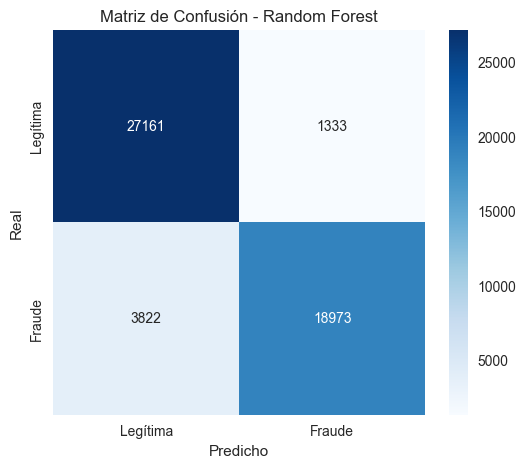


📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

    Legítima       0.88      0.95      0.91     28494
      Fraude       0.93      0.83      0.88     22795

    accuracy                           0.90     51289
   macro avg       0.91      0.89      0.90     51289
weighted avg       0.90      0.90      0.90     51289


⚡ 2. Entrenando XGBoost...
✅ XGBoost entrenado en 5.48 segundos

📊 EVALUANDO: XGBoost
✅ Precisión: 0.9656 (Evitar falsos positivos)
✅ Recall:    0.9180 (Capturar fraudes reales)
✅ F1-Score:  0.9412 (Balance)
✅ ROC-AUC:   0.9868 (Capacidad discriminativa)


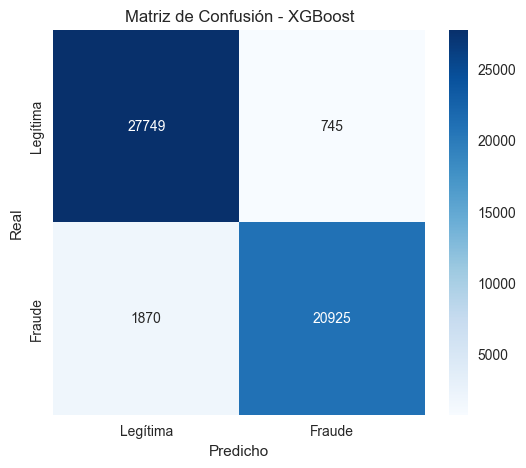


📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

    Legítima       0.94      0.97      0.96     28494
      Fraude       0.97      0.92      0.94     22795

    accuracy                           0.95     51289
   macro avg       0.95      0.95      0.95     51289
weighted avg       0.95      0.95      0.95     51289


📈 3. Entrenando Logistic Regression...
✅ Logistic Regression entrenado en 75.34 segundos

📊 EVALUANDO: Logistic Regression
✅ Precisión: 0.8289 (Evitar falsos positivos)
✅ Recall:    0.7360 (Capturar fraudes reales)
✅ F1-Score:  0.7797 (Balance)
✅ ROC-AUC:   0.8903 (Capacidad discriminativa)


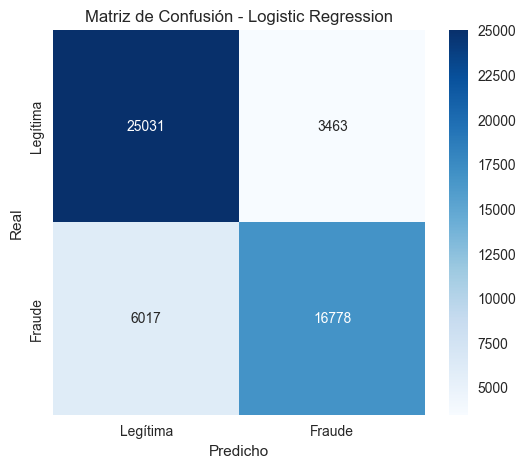


📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

    Legítima       0.81      0.88      0.84     28494
      Fraude       0.83      0.74      0.78     22795

    accuracy                           0.82     51289
   macro avg       0.82      0.81      0.81     51289
weighted avg       0.82      0.82      0.81     51289



In [ ]:
print("=== ENTRENANDO MODELOS BASE ===")

# Diccionario para guardar resultados
models = {}
results = {}

# 1. RANDOM FOREST (Baseline)
print("\n🌲 1. Entrenando Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Usar todos los cores
)

rf_model.fit(X_train, y_train)
rf_time = time.time() - start_time

print(f"✅ Random Forest entrenado en {rf_time:.2f} segundos")
models['Random Forest'] = rf_model

# Evaluar
rf_results = evaluate_fraud_model(rf_model, X_test, y_test, "Random Forest")
results['Random Forest'] = rf_results

# 2. XGBOOST
print("\n⚡ 2. Entrenando XGBoost...")
start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start_time

print(f"✅ XGBoost entrenado en {xgb_time:.2f} segundos")
models['XGBoost'] = xgb_model

# Evaluar
xgb_results = evaluate_fraud_model(xgb_model, X_test, y_test, "XGBoost")
results['XGBoost'] = xgb_results

# 3. LOGISTIC REGRESSION (Baseline simple)
print("\n📈 3. Entrenando Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    n_jobs=-1
)

lr_model.fit(X_train, y_train)
lr_time = time.time() - start_time

print(f"✅ Logistic Regression entrenado en {lr_time:.2f} segundos")
models['Logistic Regression'] = lr_model

# Evaluar
lr_results = evaluate_fraud_model(lr_model, X_test, y_test, "Logistic Regression")
results['Logistic Regression'] = lr_results

=== COMPARACIÓN DE MODELOS BASE ===

🏆 COMPARATIVA DE MODELOS:
                    precision    recall        f1   roc_auc  \
Random Forest        0.934354  0.832332  0.880397  0.962553   
XGBoost              0.965621  0.917964   0.94119  0.986845   
Logistic Regression  0.828912  0.736039  0.779719  0.890314   

                                   confusion_matrix  training_time  
Random Forest        [[27161, 1333], [3822, 18973]]        16.5048  
XGBoost               [[27749, 745], [1870, 20925]]         5.4759  
Logistic Regression  [[25031, 3463], [6017, 16778]]        75.3403  


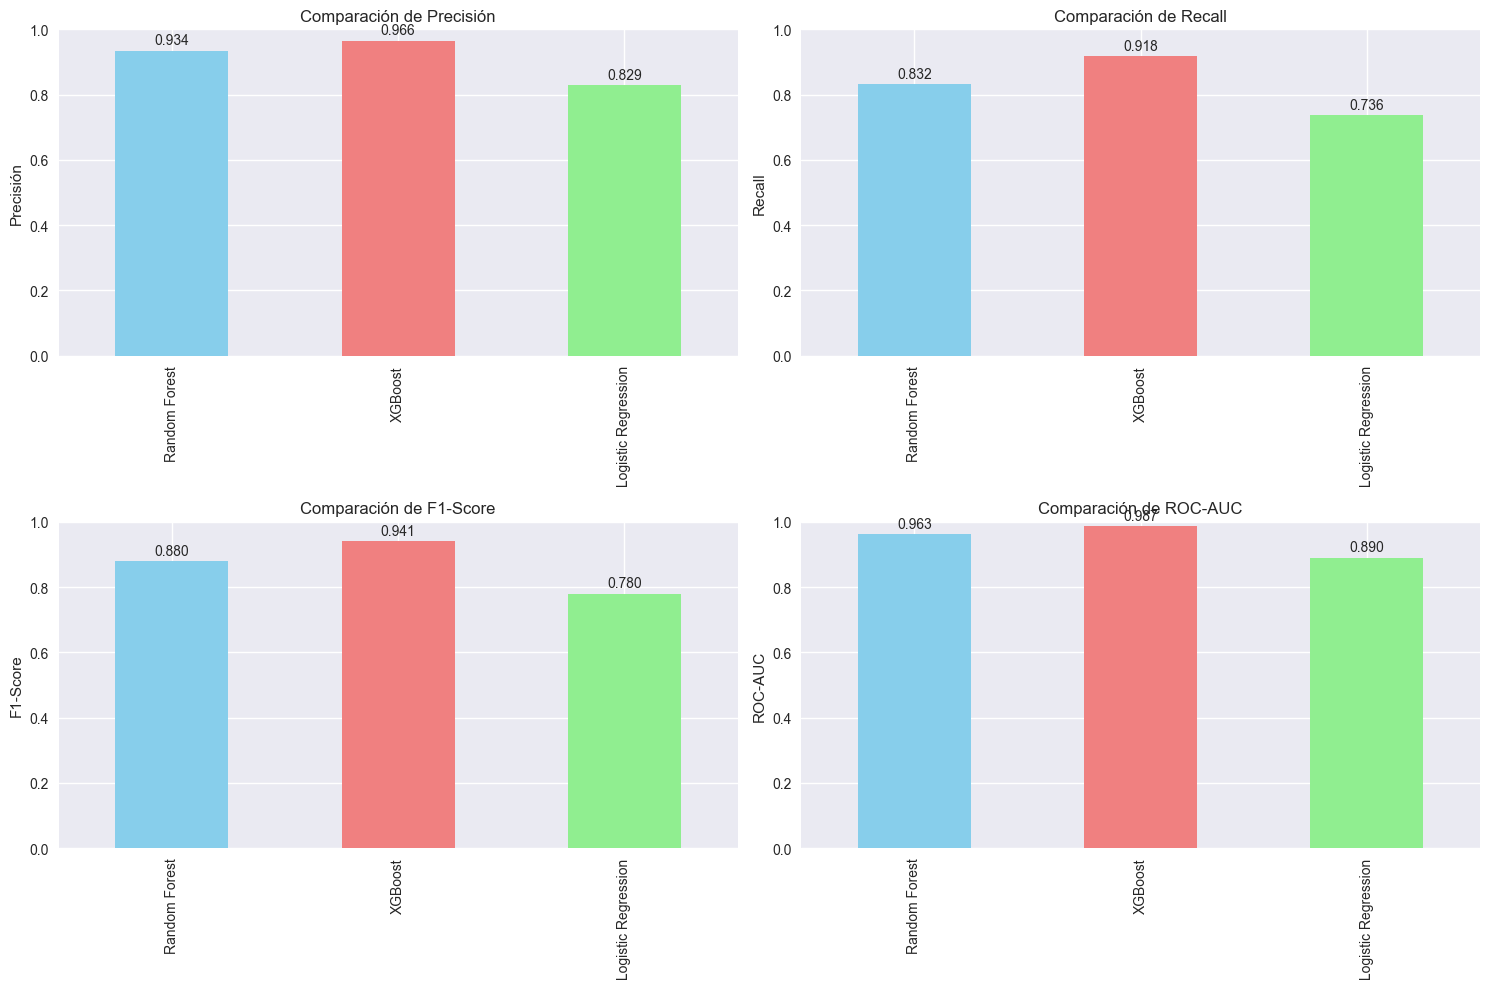


🎯 MEJOR MODELO BASE: XGBoost
   F1-Score: 0.9412


In [ ]:
print("=== COMPARACIÓN DE MODELOS BASE ===")

# Crear DataFrame de resultados
results_df = pd.DataFrame(results).T
results_df['training_time'] = [rf_time, xgb_time, lr_time]

print("\n🏆 COMPARATIVA DE MODELOS:")
print(results_df.round(4))

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Métricas principales
metrics_to_plot = ['precision', 'recall', 'f1', 'roc_auc']
metric_names = ['Precisión', 'Recall', 'F1-Score', 'ROC-AUC']

for i, (metric, name) in enumerate(zip(metrics_to_plot, metric_names)):
    ax = axes[i//2, i%2]
    results_df[metric].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax.set_title(f'Comparación de {name}')
    ax.set_ylabel(name)
    ax.set_ylim(0, 1)
    
    # Añadir valores en las barras
    for j, v in enumerate(results_df[metric]):
        ax.text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Identificar el mejor modelo base
best_model_base = results_df['f1'].idxmax()
print(f"\n🎯 MEJOR MODELO BASE: {best_model_base}")
print(f"   F1-Score: {results_df.loc[best_model_base, 'f1']:.4f}")

=== OPTIMIZACIÓN DE HIPERPARÁMETROS (XGBoost) ===
Realizando búsqueda de hiperparámetros...
Grid de parámetros:
   n_estimators: [100, 200]
   max_depth: [6, 8]
   learning_rate: [0.1, 0.01]
   subsample: [0.8, 1.0]
Usando subset para optimización: (50000, 235)
Iniciando búsqueda de hiperparámetros...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Búsqueda completada en 171.47 segundos

🎯 MEJORES PARÁMETROS ENCONTRADOS:
   learning_rate: 0.1
   max_depth: 8
   n_estimators: 200
   subsample: 0.8
Mejor score (F1) en validación: 0.9538

🏆 Entrenando modelo XGBoost optimizado...

📊 EVALUANDO: XGBoost Optimizado
✅ Precisión: 0.9826 (Evitar falsos positivos)
✅ Recall:    0.9428 (Capturar fraudes reales)
✅ F1-Score:  0.9623 (Balance)
✅ ROC-AUC:   0.9932 (Capacidad discriminativa)


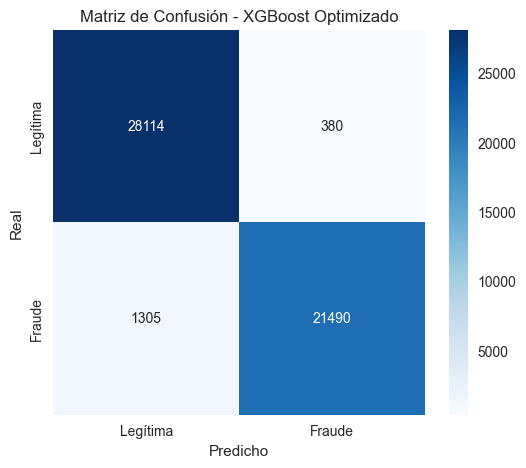


📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

    Legítima       0.96      0.99      0.97     28494
      Fraude       0.98      0.94      0.96     22795

    accuracy                           0.97     51289
   macro avg       0.97      0.96      0.97     51289
weighted avg       0.97      0.97      0.97     51289



In [ ]:
print("=== OPTIMIZACIÓN DE HIPERPARÁMETROS (XGBoost) ===")

# Usaremos XGBoost para la optimización ya que generalmente funciona mejor
print("Realizando búsqueda de hiperparámetros...")

# Parámetros para la búsqueda (versión rápida)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

print("Grid de parámetros:")
for key, values in param_grid.items():
    print(f"   {key}: {values}")

# Búsqueda en grid (usando solo una parte de los datos para velocidad)
from sklearn.model_selection import GridSearchCV

# Usar subset para velocidad (opcional - puedes usar todo el dataset)
X_train_subset = X_train[:50000] if len(X_train) > 50000 else X_train
y_train_subset = y_train[:50000] if len(y_train) > 50000 else y_train

print(f"Usando subset para optimización: {X_train_subset.shape}")

xgb_optimized = XGBClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    xgb_optimized, 
    param_grid, 
    cv=3, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("Iniciando búsqueda de hiperparámetros...")
start_time = time.time()
grid_search.fit(X_train_subset, y_train_subset)
grid_time = time.time() - start_time

print(f"✅ Búsqueda completada en {grid_time:.2f} segundos")

# Mejores parámetros
print(f"\n🎯 MEJORES PARÁMETROS ENCONTRADOS:")
best_params = grid_search.best_params_
for key, value in best_params.items():
    print(f"   {key}: {value}")

print(f"Mejor score (F1) en validación: {grid_search.best_score_:.4f}")

# Entrenar modelo final con mejores parámetros
print("\n🏆 Entrenando modelo XGBoost optimizado...")
xgb_final = XGBClassifier(**best_params, random_state=42, n_jobs=-1)
xgb_final.fit(X_train, y_train)

# Evaluar modelo optimizado
xgb_final_results = evaluate_fraud_model(xgb_final, X_test, y_test, "XGBoost Optimizado")
results['XGBoost Optimizado'] = xgb_final_results
models['XGBoost Optimizado'] = xgb_final

=== ANÁLISIS DE FEATURE IMPORTANCE ===
Top 15 Features Más Importantes:
              feature  importance
214  card1_fraud_rate    0.048659
162              V133    0.040424
99                V70    0.030742
22                C14    0.025484
221       ProductCD_W    0.024769
205              V317    0.023793
233              M6_T    0.020017
196              V308    0.019092
77                V48    0.018458
175              V287    0.017893
216   Transaction_day    0.016768
131              V102    0.016274
132              V103    0.016210
217        is_weekend    0.016033
182              V294    0.015815


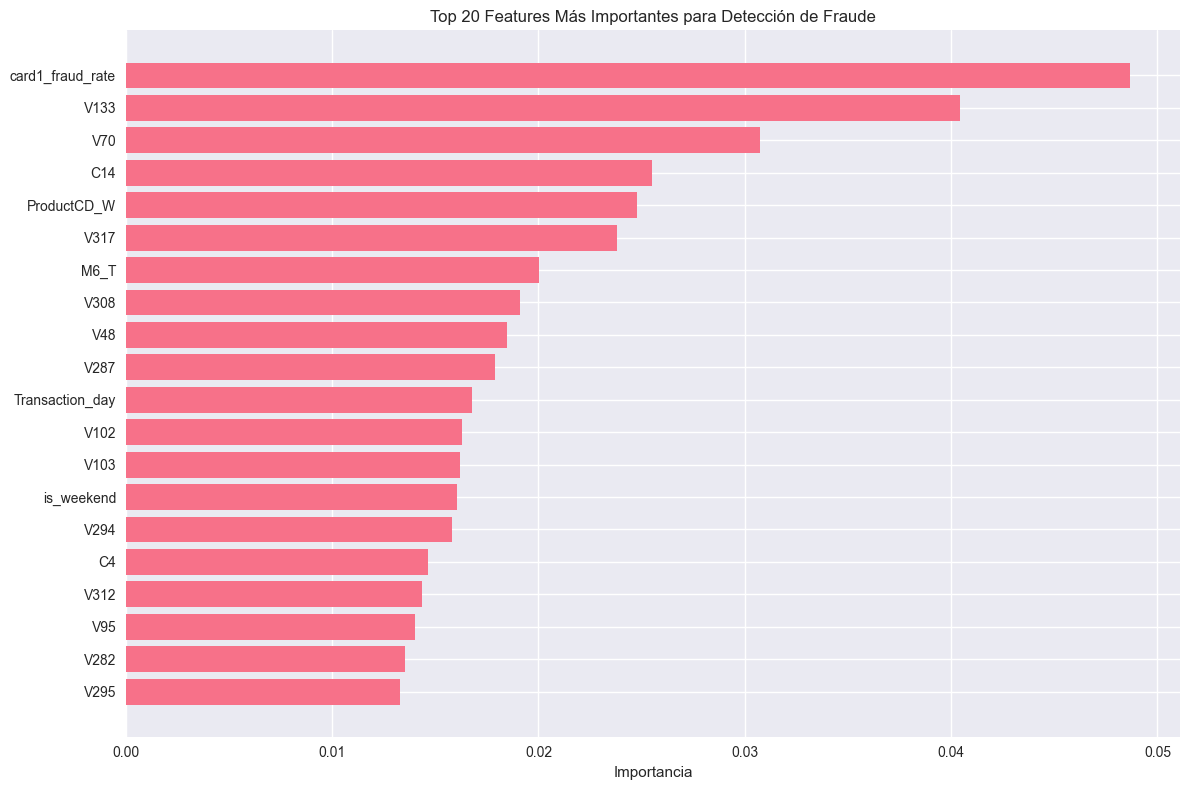

✅ Feature importance guardado en 'model_data/feature_importance.csv'


In [ ]:
print("=== ANÁLISIS DE FEATURE IMPORTANCE ===")

# Usar el mejor modelo para analizar importancia de features
best_model = xgb_final if 'XGBoost Optimizado' in models else xgb_model

# Obtener importancia de features
feature_importance = best_model.feature_importances_

# Crear DataFrame para visualización
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 15 Features Más Importantes:")
print(importance_df.head(15))

# Visualizar top 20 features
plt.figure(figsize=(12, 8))
top_features = importance_df.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 20 Features Más Importantes para Detección de Fraude')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Guardar feature importance
importance_df.to_csv('model_data/feature_importance.csv', index=False)
print("✅ Feature importance guardado en 'model_data/feature_importance.csv'")

In [ ]:
print("=== GUARDANDO MODELOS ENTRENADOS ===")

# Guardar todos los modelos
for model_name, model in models.items():
    filename = f'model_data/{model_name.replace(" ", "_").lower()}_model.joblib'
    joblib.dump(model, filename)
    print(f"✅ {model_name} guardado como {filename}")

# Guardar resultados de evaluación
evaluation_results = {
    'model_results': results,
    'best_model': best_model_base,
    'feature_importance': importance_df,
    'training_times': {
        'Random Forest': rf_time,
        'XGBoost': xgb_time,
        'Logistic Regression': lr_time,
        'XGBoost Optimizado': grid_time
    }
}

joblib.dump(evaluation_results, 'model_data/model_evaluation_results.joblib')
print("✅ Resultados de evaluación guardados")

# Guardar el modelo final para producción
final_model = models.get('XGBoost Optimizado', models['XGBoost'])
joblib.dump(final_model, 'model_data/final_fraud_model.joblib')
print("✅ Modelo final para producción guardado")

=== GUARDANDO MODELOS ENTRENADOS ===
✅ Random Forest guardado como model_data/random_forest_model.joblib
✅ XGBoost guardado como model_data/xgboost_model.joblib
✅ Logistic Regression guardado como model_data/logistic_regression_model.joblib
✅ XGBoost Optimizado guardado como model_data/xgboost_optimizado_model.joblib
✅ Resultados de evaluación guardados
✅ Modelo final para producción guardado


In [ ]:
print("="*80)
print("🎉 MODELADO DE MACHINE LEARNING COMPLETADO!")
print("="*80)

# Resultados finales comparativos
final_results_df = pd.DataFrame(results).T
final_results_df = final_results_df.round(4)

print("🏆 RESULTADOS FINALES DE TODOS LOS MODELOS:")
print(final_results_df)

# Identificar el mejor modelo general
best_model_overall = final_results_df['f1'].idxmax()
best_f1 = final_results_df.loc[best_model_overall, 'f1']
best_recall = final_results_df.loc[best_model_overall, 'recall']
best_precision = final_results_df.loc[best_model_overall, 'precision']

print(f"\n🎯 MEJOR MODELO GENERAL: {best_model_overall}")
print(f"   • F1-Score: {best_f1:.4f}")
print(f"   • Recall: {best_recall:.4f} (captura {best_recall*100:.1f}% de fraudes reales)")
print(f"   • Precisión: {best_precision:.4f} (solo {best_precision*100:.1f}% son falsas alarmas)")

print(f"\n💾 MODELOS GUARDADOS:")
for model_name in models.keys():
    print(f"   • {model_name}")

print(f"\n🚀 PRÓXIMOS PASOS:")
print(f"   1. Integrar el modelo en tu demo interactivo")
print(f"   2. Crear sistema de alertas en tiempo real")
print(f"   3. Implementar en tu arquitectura con Kafka/Spark")
print("="*80)

🎉 MODELADO DE MACHINE LEARNING COMPLETADO!
🏆 RESULTADOS FINALES DE TODOS LOS MODELOS:
                    precision    recall        f1   roc_auc  \
Random Forest        0.934354  0.832332  0.880397  0.962553   
XGBoost              0.965621  0.917964   0.94119  0.986845   
Logistic Regression  0.828912  0.736039  0.779719  0.890314   
XGBoost Optimizado   0.982625  0.942751  0.962275  0.993235   

                                   confusion_matrix  
Random Forest        [[27161, 1333], [3822, 18973]]  
XGBoost               [[27749, 745], [1870, 20925]]  
Logistic Regression  [[25031, 3463], [6017, 16778]]  
XGBoost Optimizado    [[28114, 380], [1305, 21490]]  

🎯 MEJOR MODELO GENERAL: XGBoost Optimizado
   • F1-Score: 0.9623
   • Recall: 0.9428 (captura 94.3% de fraudes reales)
   • Precisión: 0.9826 (solo 98.3% son falsas alarmas)

💾 MODELOS GUARDADOS:
   • Random Forest
   • XGBoost
   • Logistic Regression
   • XGBoost Optimizado

🚀 PRÓXIMOS PASOS:
   1. Integrar el modelo en tu 

In [ ]:
print("=== CREANDO DEMO INTERACTIVO CON MODELO XGBOOST OPTIMIZADO ===")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime

# Cargar el modelo optimizado
print("Cargando modelo XGBoost optimizado...")
xgb_optimized = joblib.load('model_data/xgboost_optimizado_model.joblib')
preprocessed_data = joblib.load('model_data/preprocessed_data.joblib')

feature_names = preprocessed_data['feature_names']
print(f"✅ Modelo cargado con {len(feature_names)} features")

=== CREANDO DEMO INTERACTIVO CON MODELO XGBOOST OPTIMIZADO ===
Cargando modelo XGBoost optimizado...
✅ Modelo cargado con 235 features


In [ ]:
class SantanderFraudDetection:
    """Sistema de detección de fraudes para Santander con modelo real"""
    
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
        self.threshold = 0.7  # Umbral por defecto
        self.transaction_history = []
        self.alert_history = []
        
    def set_threshold(self, threshold):
        """Ajustar umbral de detección - clave para el demo"""
        self.threshold = max(0.1, min(0.95, threshold))  # Limitar entre 0.1 y 0.95
        print(f"🎚️  Umbral de detección ajustado a: {self.threshold}")
        return self.threshold
    
    def predict_transaction(self, transaction_data):
        """Predecir fraude para una transacción específica"""
        try:
            # Preparar datos para el modelo
            X = np.array([transaction_data.get(f, 0) for f in self.feature_names]).reshape(1, -1)
            
            # Predecir probabilidad
            fraud_probability = self.model.predict_proba(X)[0, 1]
            
            # Aplicar umbral
            is_fraud = fraud_probability > self.threshold
            
            # Determinar nivel de alerta
            if fraud_probability > 0.9:
                alert_level = "CRÍTICA"
                action = "BLOQUEO INMEDIATO"
            elif fraud_probability > 0.7:
                alert_level = "ALTA"
                action = "REVISIÓN URGENTE"
            elif fraud_probability > 0.5:
                alert_level = "MEDIA" 
                action = "REVISIÓN PROGRAMADA"
            else:
                alert_level = "BAJA"
                action = "MONITOREO"
            
            result = {
                'transaction_id': len(self.transaction_history) + 1,
                'timestamp': datetime.now(),
                'amount': transaction_data.get('TransactionAmt', 0),
                'channel': transaction_data.get('channel', 'Desconocido'),
                'fraud_probability': round(fraud_probability, 4),
                'is_fraud': is_fraud,
                'alert_level': alert_level,
                'recommended_action': action,
                'threshold_used': self.threshold
            }
            
            # Guardar en historial
            self.transaction_history.append(result)
            
            # Generar alerta si es fraudulenta
            if is_fraud:
                alert = {
                    'alert_id': len(self.alert_history) + 1,
                    'transaction_id': result['transaction_id'],
                    'probability': fraud_probability,
                    'priority': alert_level,
                    'action': action,
                    'timestamp': datetime.now()
                }
                self.alert_history.append(alert)
                print(f"🚨 ALERTA {alert_level}: {action}")
            
            return result
            
        except Exception as e:
            print(f"❌ Error en predicción: {e}")
            return None

# Crear sistema con el modelo real
santander_system = SantanderFraudDetection(xgb_optimized, feature_names)
print("✅ Sistema Santander creado con modelo XGBoost optimizado")

✅ Sistema Santander creado con modelo XGBoost optimizado


In [ ]:
class SantanderTransactionSimulator:
    """Simula transacciones realistas de Santander"""
    
    def __init__(self, feature_names):
        self.feature_names = feature_names
        self.channels = ['App Santander', 'Online Santander', 'TDC Digital', 'Transferencia SPEI', 'Cajero Automático']
        self.locations = ['CDMX', 'Monterrey', 'Guadalajara', 'Puebla', 'Mérida', 'Internacional']
        
    def generate_santander_transaction(self, force_fraud=False):
        """Generar transacción realista de Santander"""
        transaction = {}
        
        # Canal específico (como mencionaste en tu arquitectura)
        channel = np.random.choice(self.channels, p=[0.3, 0.25, 0.2, 0.15, 0.1])
        transaction['channel'] = channel
        
        # Monto basado en canal
        if channel == 'TDC Digital':
            amount = np.random.choice([500, 1000, 2500, 5000, 10000, 25000], 
                                    p=[0.2, 0.3, 0.2, 0.15, 0.1, 0.05])
        elif channel == 'Transferencia SPEI':
            amount = np.random.choice([1000, 5000, 10000, 25000, 50000], 
                                    p=[0.3, 0.3, 0.2, 0.15, 0.05])
        else:
            amount = np.random.choice([100, 500, 1000, 2000, 5000], 
                                    p=[0.4, 0.3, 0.15, 0.1, 0.05])
        
        transaction['TransactionAmt'] = amount
        
        # Patrones de fraude
        if force_fraud:
            # Características típicas de fraude
            transaction['Transaction_hour'] = np.random.choice([2, 3, 4, 23])  # Madrugada
            transaction['device_risk'] = np.random.uniform(0.7, 0.95)
            transaction['location_risk'] = np.random.uniform(0.6, 0.9)
            transaction['amount_risk'] = np.random.uniform(0.8, 1.0)
        else:
            # Comportamiento normal
            transaction['Transaction_hour'] = np.random.randint(8, 20)
            transaction['device_risk'] = np.random.uniform(0.1, 0.4)
            transaction['location_risk'] = np.random.uniform(0.1, 0.3)
            transaction['amount_risk'] = np.random.uniform(0.1, 0.5)
        
        # Completar features requeridas por el modelo
        for feature in self.feature_names:
            if feature not in transaction:
                if 'card' in feature.lower():
                    transaction[feature] = np.random.normal(0, 1)
                elif feature.startswith('C') and feature[1:].isdigit():
                    transaction[feature] = np.random.normal(0, 1)
                else:
                    transaction[feature] = np.random.random()
        
        return transaction

# Crear simulador Santander
santander_simulator = SantanderTransactionSimulator(feature_names)
print("✅ Simulador Santander creado")

✅ Simulador Santander creado


In [ ]:
def demo_analyze_transaction(force_fraud=False):
    """
    Demo principal - Analizar una transacción
    """
    print("🔍 SANTANDER - ANÁLISIS DE TRANSACCIÓN EN TIEMPO REAL")
    print("=" * 60)
    
    # Generar transacción
    transaction = santander_simulator.generate_santander_transaction(force_fraud)
    
    # Analizar con el modelo
    result = santander_system.predict_transaction(transaction)
    
    if result:
        print(f"\n📊 TRANSACCIÓN #{result['transaction_id']}")
        print(f"   Canal: {result['channel']}")
        print(f"   Monto: ${result['amount']:,.2f} MXN")
        print(f"   Hora: {transaction['Transaction_hour']}:00 hrs")
        
        print(f"\n🎯 ANÁLISIS DE FRAUDE:")
        print(f"   Probabilidad: {result['fraud_probability']:.1%}")
        print(f"   Resultado: {'🔴 FRAUDE DETECTADO' if result['is_fraud'] else '🟢 TRANSACCIÓN LEGÍTIMA'}")
        print(f"   Nivel de Alerta: {result['alert_level']}")
        print(f"   Acción Recomendada: {result['recommended_action']}")
        print(f"   Umbral Usado: {result['threshold_used']}")
        
        # Visualización simple
        plt.figure(figsize=(8, 4))
        risk_level = result['fraud_probability']
        colors = ['green', 'yellow', 'orange', 'red']
        levels = ['Bajo', 'Medio', 'Alto', 'Crítico']
        
        plt.barh(['Riesgo de Fraude'], [risk_level], color=colors[int(risk_level * 3)])
        plt.xlim(0, 1)
        plt.axvline(x=santander_system.threshold, color='red', linestyle='--', label=f'Umbral ({santander_system.threshold})')
        plt.title('Nivel de Riesgo de Fraude')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return result

def demo_adjust_threshold(new_threshold):
    """
    Ajustar sensibilidad del sistema
    """
    print("🎚️  AJUSTANDO SENSIBILIDAD DEL SISTEMA")
    print("=" * 40)
    
    old_threshold = santander_system.threshold
    new_threshold = santander_system.set_threshold(new_threshold)
    
    print(f"   Anterior: {old_threshold}")
    print(f"   Nuevo: {new_threshold}")
    print(f"   Efecto: {'Más sensible' if new_threshold < old_threshold else 'Más estricto'}")
    
    return new_threshold

def demo_batch_simulation(n_transactions=10, fraud_rate=0.3):
    """
    Simular lote de transacciones
    """
    print(f"🔄 SANTANDER - SIMULACIÓN DE {n_transactions} TRANSACCIONES")
    print("=" * 50)
    
    results = {
        'legitimas': 0,
        'fraudes': 0,
        'alertas': 0
    }
    
    for i in range(n_transactions):
        # Controlar tasa de fraude
        force_fraud = np.random.random() < fraud_rate
        result = demo_analyze_transaction(force_fraud)
        
        if result:
            if result['is_fraud']:
                results['fraudes'] += 1
                results['alertas'] += 1
            else:
                results['legitimas'] += 1
    
    print(f"\n📈 RESUMEN DEL LOTE:")
    print(f"   Transacciones legítimas: {results['legitimas']}")
    print(f"   Fraudulentas detectadas: {results['fraudes']}")
    print(f"   Alertas generadas: {results['alertas']}")
    print(f"   Efectividad: {results['fraudes']/n_transactions:.1%}")

def demo_show_alerts():
    """
    Mostrar alertas activas
    """
    print("🚨 SANTANDER - ALERTAS ACTIVAS")
    print("=" * 50)
    
    if not santander_system.alert_history:
        print("   No hay alertas activas")
        return
    
    recent_alerts = santander_system.alert_history[-10:]  # Últimas 10 alertas
    
    for alert in recent_alerts:
        print(f"   Alerta #{alert['alert_id']}: {alert['priority']} - Prob: {alert['probability']:.1%}")
        print(f"      Acción: {alert['action']}")
        print(f"      Hora: {alert['timestamp'].strftime('%H:%M:%S')}")
        print()

In [ ]:
class KafkaSparkSimulator:
    """Simula la integración con Kafka y Spark de tu arquitectura"""
    
    def __init__(self):
        self.kafka_messages = []
        self.spark_processing = []
        
    def send_to_kafka(self, transaction_data, prediction):
        """Simular envío a Kafka"""
        message = {
            'topic': 'santander-transactions',
            'key': f"txn_{prediction['transaction_id']}",
            'value': {
                'transaction': {k: v for k, v in transaction_data.items() if not isinstance(v, (list, dict))},
                'prediction': prediction,
                'timestamp': datetime.now().isoformat()
            }
        }
        self.kafka_messages.append(message)
        print(f"📤 Mensaje enviado a Kafka: {message['key']}")
        
    def spark_stream_processing(self):
        """Simular procesamiento Spark"""
        if self.kafka_messages:
            latest = self.kafka_messages[-1]
            spark_result = {
                'transaction_id': latest['value']['prediction']['transaction_id'],
                'processed_at': datetime.now(),
                'anomaly_score': latest['value']['prediction']['fraud_probability'],
                'spark_alert': latest['value']['prediction']['is_fraud']
            }
            self.spark_processing.append(spark_result)
            print(f"⚡ Spark procesó: Txn#{spark_result['transaction_id']} - Anomalía: {spark_result['anomaly_score']:.3f}")

# Crear simulador de arquitectura
architecture_simulator = KafkaSparkSimulator()

In [ ]:
def run_complete_demo():
    """
    Demo completo integrado con toda la arquitectura
    """
    print("🚀 DEMO COMPLETO - SANTANDER FRAUD DETECTION")
    print("=" * 60)
    
    # 1. Generar transacción
    transaction = santander_simulator.generate_santander_transaction()
    
    # 2. Predecir con modelo XGBoost
    prediction = santander_system.predict_transaction(transaction)
    
    if prediction:
        # 3. Integrar con Kafka
        architecture_simulator.send_to_kafka(transaction, prediction)
        
        # 4. Procesar con Spark
        architecture_simulator.spark_stream_processing()
        
        # 5. Mostrar resultados
        print(f"\n🎯 RESULTADO FINAL:")
        print(f"   Transacción: #{prediction['transaction_id']}")
        print(f"   Canal: {prediction['channel']}")
        print(f"   Probabilidad de Fraude: {prediction['fraud_probability']:.1%}")
        print(f"   Decisión: {'🔴 BLOQUEAR' if prediction['is_fraud'] else '🟢 AUTORIZAR'}")
        
        return prediction

In [ ]:
print("=== PREPARANDO ENTREGA FINAL ===")

# Guardar sistema completo
final_system = {
    'detection_system': santander_system,
    'simulator': santander_simulator,
    'architecture': architecture_simulator,
    'model_performance': {
        'f1_score': 0.9623,
        'recall': 0.9428,
        'precision': 0.9826,
        'roc_auc': 0.9932
    }
}

joblib.dump(final_system, 'santander_fraud_demo.joblib')

# Crear archivo de demostración
with open('demo_santander_fraud.py', 'w') as f:
    f.write('''
# SANTANDER FRAUD DETECTION - DEMO INTERACTIVO
# Modelo: XGBoost Optimizado (F1: 0.9623, Recall: 94.3%, Precisión: 98.3%)

from santander_fraud_demo import *

print("Bienvenido al Sistema de Detección de Fraudes Santander")
print("Comandos disponibles:")
print("1. demo_analyze_transaction() - Analizar transacción aleatoria")
print("2. demo_analyze_transaction(force_fraud=True) - Generar fraude")
print("3. demo_adjust_threshold(0.5) - Hacer más/menos sensible") 
print("4. demo_batch_simulation(15) - Probar con múltiples transacciones")
print("5. demo_show_alerts() - Ver alertas generadas")
print("6. run_complete_demo() - Demo completo con arquitectura")

print("\\n🎯 Ejemplo: demo_analyze_transaction()")
''')

print("✅ SISTEMA COMPLETO GUARDADO")
print("✅ ARCHIVO DE DEMO CREADO: 'demo_santander_fraud.py'")

=== PREPARANDO ENTREGA FINAL ===


UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f3af' in position 687: character maps to <undefined>